In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.decomposition import PCA
import random
import numpy as np
random.seed()

In [4]:
content_df = pd.read_csv("/Users/susmitapoudel/desktop/dsc500/dataset.csv", on_bad_lines='skip')
content_df.head()


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [4]:
content_df.nunique()

Unnamed: 0          114000
track_id             89741
artists              31437
album_name           46589
track_name           73608
popularity             101
duration_ms          50697
explicit                 2
danceability          1174
energy                2083
key                     12
loudness             19480
mode                     2
speechiness           1489
acousticness          5061
instrumentalness      5346
liveness              1722
valence               1790
tempo                45653
time_signature           5
track_genre            114
dtype: int64

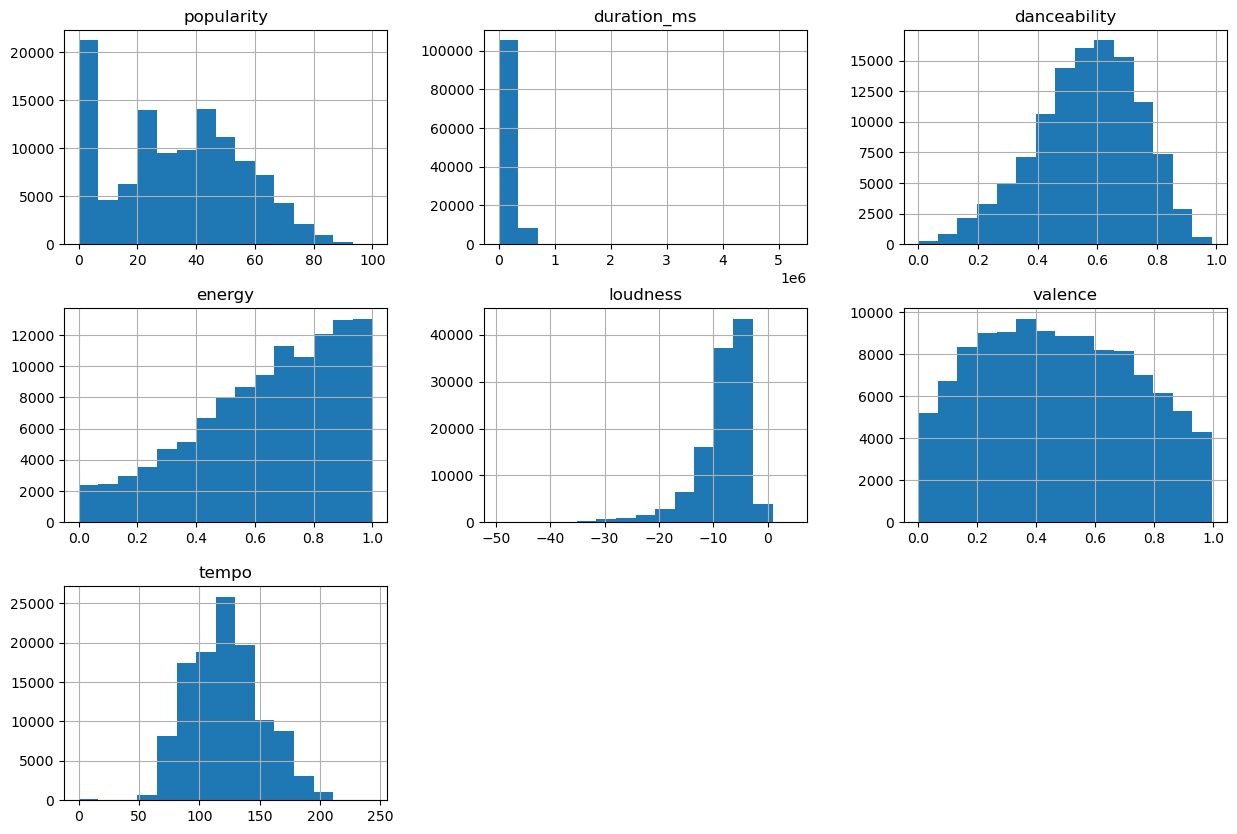

In [5]:
numerical_features = ['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'valence', 'tempo']
content_df[numerical_features].hist(bins=15, figsize=(15, 10))
plt.show()

In [6]:
print(content_df.shape)
print(content_df.isnull().sum())


(114000, 21)
Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [7]:
content_df = content_df.dropna()
print(content_df.columns)
content_df= content_df.drop(columns=['Unnamed: 0'])
print(content_df.isnull().sum())
content_df.drop_duplicates(subset='track_id', keep='first', inplace=True)


Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [8]:
content_df.drop_duplicates(subset = None, inplace = True, ignore_index = False)
content_df.head()


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


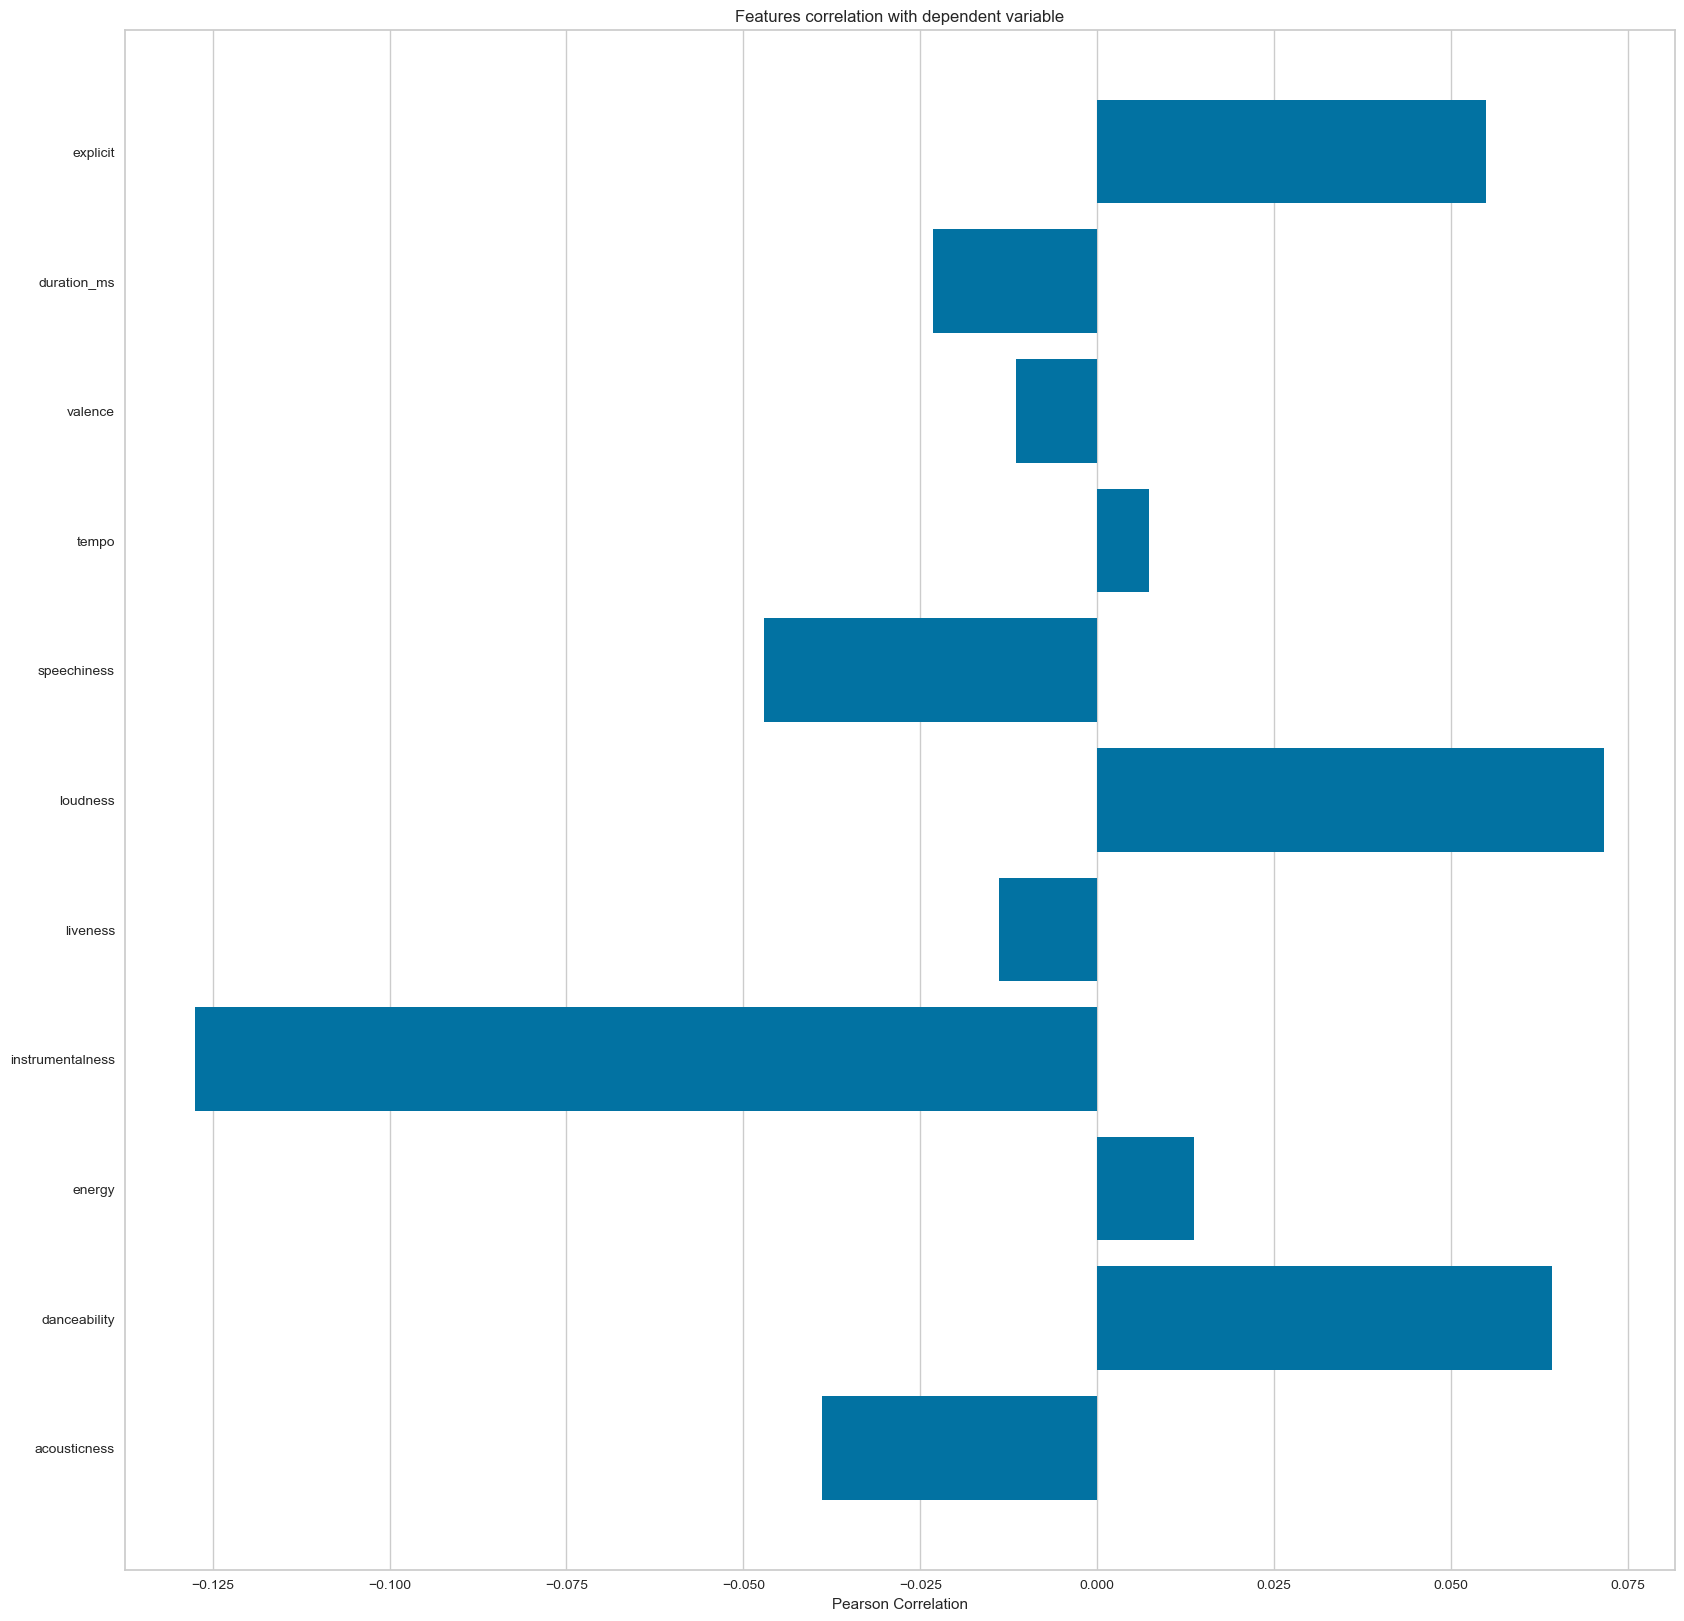

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [9]:

from yellowbrick.target import FeatureCorrelation

feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_ms','explicit']

X, y = content_df[feature_names], content_df['popularity']

# Create a list of the feature names
features = np.array(feature_names)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(20,20)
visualizer.fit(X, y)     # Fit the data to the visualizer
visualizer.show()

In [10]:
# preprocessor = ColumnTransformer([
#     ('num', StandardScaler(), ['danceability', 'energy', 'acousticness', 
#                                'instrumentalness', 'liveness', 'loudness', 
#                                'speechiness', 'valence', 'tempo', 'duration_ms']),
#     ('cat', OneHotEncoder(), ['track_genre', 'explicit', 'key', 'mode'])
# ])

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), ['energy', 'acousticness', 
                               'instrumentalness', 'liveness',  
                               'valence', 'tempo', 'popularity']),
    ('cat', OneHotEncoder(), ['track_genre', 'explicit'])
])


In [11]:
# Apply transformation
feature_matrix = preprocessor.fit_transform(content_df)
print(feature_matrix)

  (0, 0)	-0.6759747719526596
  (0, 1)	-0.8751658976308748
  (0, 2)	-0.5354815810833219
  (0, 3)	0.7236563307563374
  (0, 4)	0.9340471131598186
  (0, 5)	-1.1335985334746475
  (0, 6)	1.9339249663812337
  (0, 7)	1.0
  (0, 120)	1.0
  (1, 0)	-1.825601859587553
  (1, 1)	1.7608103491872584
  (1, 2)	-0.5354675312596674
  (1, 3)	-0.5950782181454969
  (1, 4)	-0.7702687333043063
  (1, 5)	-1.4798426103898021
  (1, 6)	1.0593117361227156
  (1, 7)	1.0
  (1, 120)	1.0
  (2, 0)	-1.0734729514060806
  (2, 1)	-0.34962589237828
  (2, 2)	-0.5354846998353859
  (2, 3)	-0.5129780127663943
  (2, 4)	-1.3294973704253474
  (2, 5)	-1.518258835647842
  (2, 6)	1.1564909839292175
  :	:
  (89737, 2)	-0.5354846998353859
  (89737, 3)	-0.6828228126444127
  (89737, 4)	1.0405668535638266
  (89737, 5)	0.3426536628932746
  (89737, 6)	-0.5441458526845677
  (89737, 119)	1.0
  (89737, 120)	1.0
  (89738, 0)	-0.5006079280761505
  (89738, 1)	0.15581472009750016
  (89738, 2)	-0.5354846998353859
  (89738, 3)	0.2721052011712737
  (8973

In [12]:
kmeans = KMeans(n_clusters=10, random_state=0)  # Adjust n_clusters based on your dataset
clusters = kmeans.fit_predict(feature_matrix)

In [13]:
content_df['cluster'] = clusters

In [14]:

feature_matrix = preprocessor.fit_transform(content_df).toarray()
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(feature_matrix)

Silhouette Score for 3 clusters: 0.295
Silhouette Score for 4 clusters: 0.261
Silhouette Score for 5 clusters: 0.307
Silhouette Score for 6 clusters: 0.267
Silhouette Score for 7 clusters: 0.264
Silhouette Score for 8 clusters: 0.249
Silhouette Score for 9 clusters: 0.252


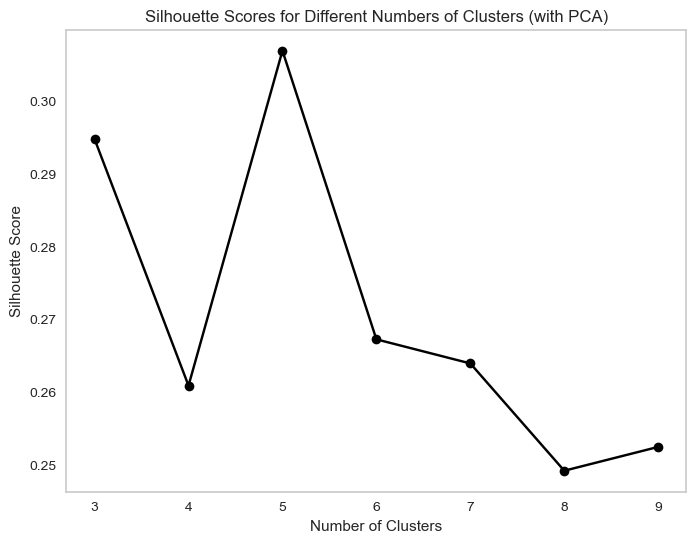

In [22]:
cluster_range = range(3, 10)  # Testing from 2 to 10 clusters
silhouette_scores = []

# Loop through the range of clusters
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(reduced_data)
    sil_score = silhouette_score(reduced_data, cluster_labels)
    silhouette_scores.append(sil_score)
    print(f"Silhouette Score for {n_clusters} clusters: {sil_score:.3f}")

# Plot the silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', color='black')
plt.title("Silhouette Scores for Different Numbers of Clusters (with PCA)")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
#plt.xticks(cluster_range)
plt.grid()
plt.show()

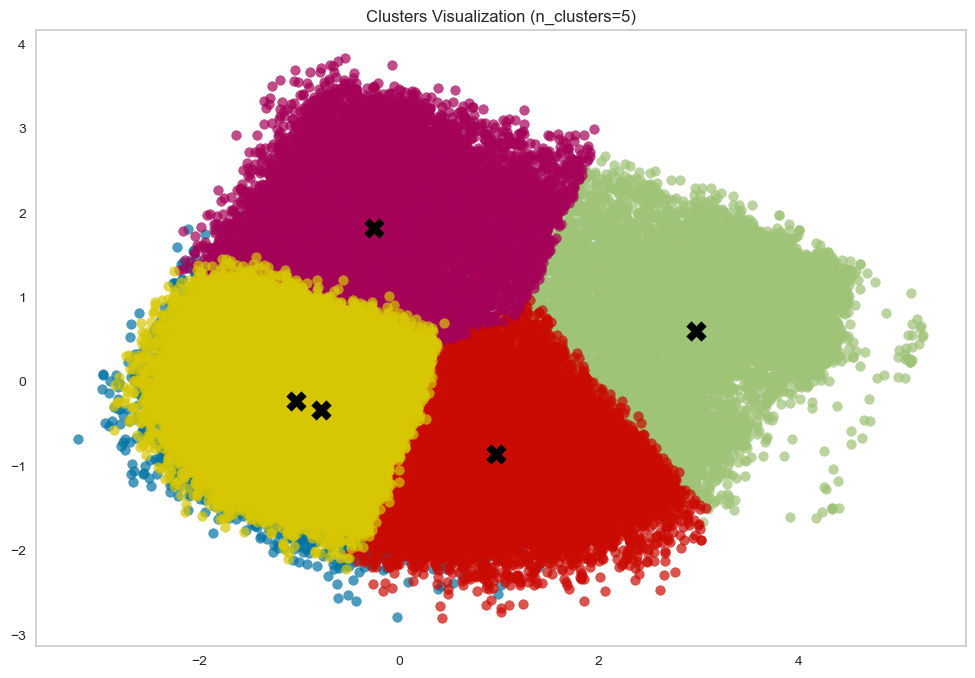

In [21]:

n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(reduced_data)

#plt.figure(figsize=(10, 8))
plt.figure(figsize=(12, 8))

for cluster in range(n_clusters):
    cluster_points = reduced_data[cluster_labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster + 1}', alpha=0.7)

# Plot cluster centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', marker='X', label='Centroids')

# Formatting the plot
plt.title(f'Clusters Visualization (n_clusters={n_clusters})', fontsize=12)
plt.grid(False)
plt.show()



In [130]:
content_df['cluster'] = cluster_labels
print(content_df['cluster'])
print(content_df)

0         4
1         2
2         2
3         2
4         2
         ..
113995    1
113996    1
113997    2
113998    2
113999    2
Name: cluster, Length: 89740, dtype: int32
                      track_id                 artists  \
0       5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1       4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2       1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3       6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4       5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...                        ...                     ...   
113995  2C3TZjDRiAzdyViavDJ217           Rainy Lullaby   
113996  1hIz5L4IB9hN3WRYPOCGPw           Rainy Lullaby   
113997  6x8ZfSoqDjuNa5SVP5QjvX           Cesária Evora   
113998  2e6sXL2bYv4bSz6VTdnfLs        Michael W. Smith   
113999  2hETkH7cOfqmz3LqZDHZf5           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1     

In [118]:
print(reduced_data)

[[-0.39321085 -1.5347582  -0.34126599]
 [ 2.6776751  -1.53202957 -0.65742307]
 [ 1.21836891 -0.3949958  -0.83829721]
 ...
 [ 1.15562665 -1.40358939 -0.17623834]
 [ 0.10691139 -0.42428258 -0.15977336]
 [ 1.05501761 -1.40157186  0.29215221]]


In [131]:
def recommend_similar_tracks(track_id, content_df, n_recommendations=5):
    """
    Recommends similar tracks based on the cluster of the input track.

    Args:
        track_id (str): The track ID for which similar tracks are recommended.
        content_df (pd.DataFrame): DataFrame with song features and 'cluster' column.
        n_recommendations (int): Number of recommendations to generate. Default is 5.

    Returns:
        List[str]: A list of recommended track names.
    """
    # Step 1: Find the cluster of the input track
    if track_id not in content_df['track_id'].values:
        return "Track ID not found in the dataset."

    track_cluster = content_df.loc[content_df['track_id'] == track_id, 'cluster'].values[0]

    # Step 2: Get other tracks from the same cluster, excluding the input track
    similar_tracks = content_df[
        (content_df['cluster'] == track_cluster) & 
        (content_df['track_id'] != track_id)
    ]

    # Step 3: Sort by popularity and select top recommendations
    top_recommendations = similar_tracks.sort_values('popularity', ascending=False).head(n_recommendations)

    return top_recommendations['track_name'].tolist()





 
    

In [140]:
recommend_similar_tracks("5SuOikwiRyPMVoIQDJUgSV", content_df)

['Unholy (feat. Kim Petras)',
 'Quevedo: Bzrp Music Sessions, Vol. 52',
 'La Bachata',
 "I'm Good (Blue)",
 'Me Porto Bonito']

In [146]:
recommend_similar_tracks("6lfxq3CG4xtTiEg7opyCyx",content_df)

['Efecto', 'Glimpse of Us', 'Another Love', 'PROVENZA', 'I Wanna Be Yours']